In [13]:
import pandas as pd
import numpy as np

In [14]:
Data = {
    'Stutent_ID' : [1,2,3,4,5,6,7,8,9,10],
    'Math_Score' : [76,85,34,96,88,np.nan,21,64,81,99],
    'Reading_Score' : [82,65,23,46,92,35,35,56,9,65],
    'Hours_Studied' : [2,4,2,3,8,1,0.6,0.9,9,3]
}
df = pd.DataFrame(Data)
df

,Stutent_ID,Math_Score,Reading_Score,Hours_Studied
0,1,76.0,82,2.0
1,2,85.0,65,4.0
2,3,34.0,23,2.0
3,4,96.0,46,3.0
4,5,88.0,92,8.0
5,6,NaN,35,1.0
6,7,21.0,35,0.6
7,8,64.0,56,0.9
8,9,81.0,9,9.0
9,10,99.0,65,3.0


In [15]:
df.isnull().sum()

Stutent_ID       0
Math_Score       1
Reading_Score    0
Hours_Studied    0
dtype: int64

In [16]:
df['Math_Score'].fillna(df['Math_Score'].mean(),inplace = True)

C:\Users\ASHISH BAGHMAR\AppData\Local\Temp\ipykernel_16784\3090221053.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Math_Score'].fillna(df['Math_Score'].mean(),inplace = True)


In [17]:
df.isnull().sum()

Stutent_ID       0
Math_Score       0
Reading_Score    0
Hours_Studied    0
dtype: int64

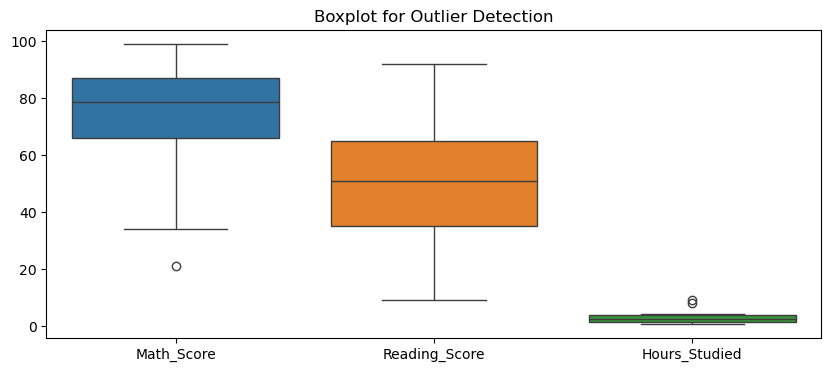

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,4))
sns.boxplot(data=df[['Math_Score', 'Reading_Score', 'Hours_Studied']])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [19]:
def get_outliers(series):
    Q1=series.quantile(0.25)
    Q3=series.quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - 1.5 * IQR
    Upper_bound = Q3 + 1.5 * IQR

    outliers = series[ (series < lower_bound) | (series > Upper_bound)]
    return outliers, lower_bound, Upper_bound

outliers, lower, upper = get_outliers(df["Math_Score"])

print("Lower: ", lower)
print("Upper: ", upper)
print("Outliers: ", len(outliers))
print("Outlier Values:")
print(outliers.sort_values())


Lower:  33.847222222222214
Upper:  119.29166666666667
Outliers:  1
Outlier Values:
6    21.0
Name: Math_Score, dtype: float64


In [20]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3-Q1 
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    return series.apply(lambda x:lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

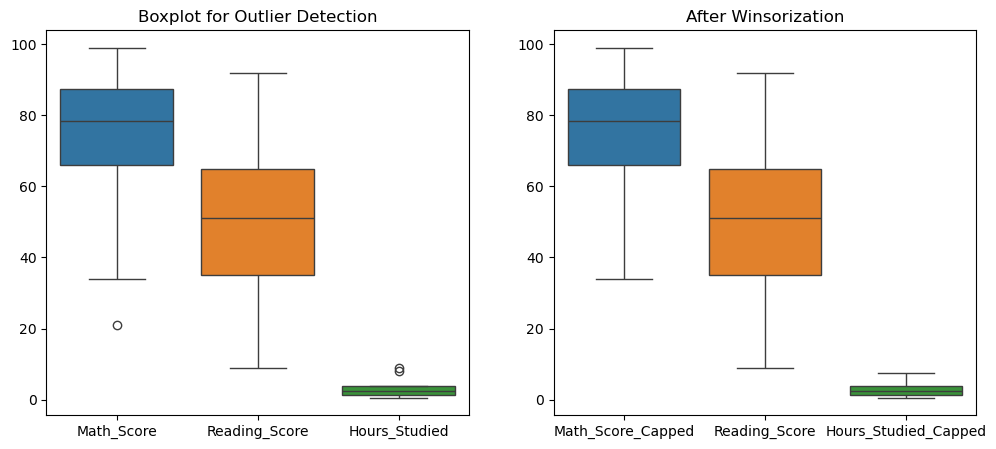

In [21]:
df['Math_Score_Capped'] = cap_outliers(df['Math_Score'])
df['Hours_Studied_Capped'] = cap_outliers(df['Hours_Studied'])

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df[['Math_Score', 'Reading_Score', 'Hours_Studied']])
plt.title('Boxplot for Outlier Detection')

plt.subplot(1,2,2)
sns.boxplot(data = df[['Math_Score_Capped','Reading_Score', 'Hours_Studied_Capped' ]])
plt.title("After Winsorization")

plt.show()


In [22]:
df['Log_Math_Score'] = np.log1p(df['Math_Score'])
df['Log_Hours_Studied'] = np.log1p(df['Hours_Studied'])
print("Original Skew: ",df['Math_Score'].skew())
print("Transformed Skew: ", df['Log_Math_Score'].skew())
print(df)
                                
                                

Original Skew:  -1.1445895382626017
Transformed Skew:  -1.6970457164291104
   Stutent_ID  Math_Score  Reading_Score  Hours_Studied  Math_Score_Capped  \
0           1   76.000000             82            2.0          76.000000   
1           2   85.000000             65            4.0          85.000000   
2           3   34.000000             23            2.0          34.000000   
3           4   96.000000             46            3.0          96.000000   
4           5   88.000000             92            8.0          88.000000   
5           6   71.555556             35            1.0          71.555556   
6           7   21.000000             35            0.6          33.847222   
7           8   64.000000             56            0.9          64.000000   
8           9   81.000000              9            9.0          81.000000   
9          10   99.000000             65            3.0          99.000000   

   Hours_Studied_Capped  Log_Math_Score  Log_Hours_Studied  
0    

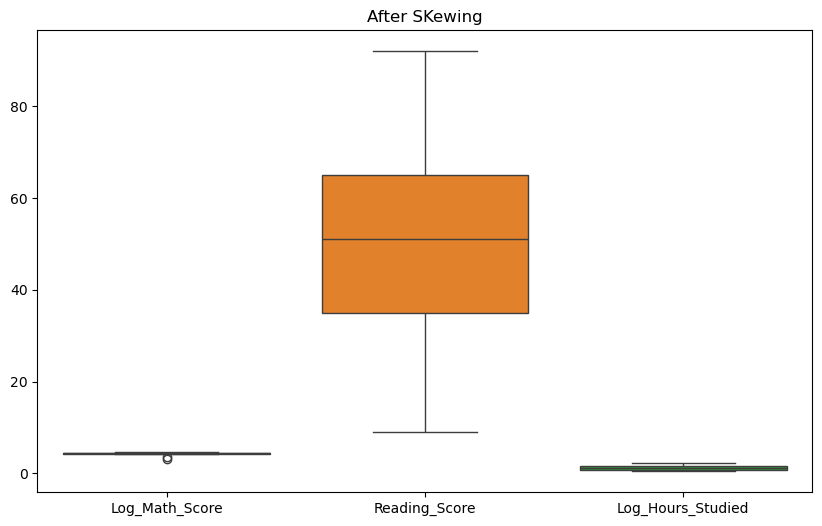

In [23]:
plt.figure(figsize = (10,6))
sns.boxplot(data=df[['Log_Math_Score', 'Reading_Score', 'Log_Hours_Studied']])
plt.title("After SKewing")
plt.show()